<a href="https://colab.research.google.com/github/zzhenxi/CP2/blob/main/jh_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업 목록 

1.  **셀럽이 어떻게 활동해야 팬들이 좋아하는지 분석**
    - 상위 n퍼센트에 속하는 셀럽에 대한 분석과 시각화 자료
        
        `그래프로 (직관적으로) 보여주는 것에 중점`
        
        - 셀럽이 먼저 대화를 시작한 경우 비율 (날짜별로)
        - 셀럽의 태도에 따른 시간의 흐름에 따른 긍정도 변화의 시각화
        - 시간의 흐름에 따른 셀럽의 말에 대한 팬의 응답률
            
            → 이렇게 했더니 팬의 응답률이 올라갔다고 제시하기 위함
            
        - 시간의 흐름에 따른 긍정도 변화 선그래프
            
             → 이렇게 했더니 팬의 긍정도가 올라갔다고 제시하기 위함

- 아쉬운 부분 : 🥺 표시
- 그래프 사용 색 :    
'#fff38b'   
'#fef8c5'   
'#f9d9b1'   

## 한국어 폰트 설치 등

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (4,896 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

## 데이터 가져오기
- data : 모든 데이터 목록

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [3]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/AIB_PJ2/dataset/[jh]cleaned_data_new.csv", keep_default_na=False)

In [5]:
data

,Unnamed: 0,date,time,celeb,code,comments,file
0,1,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,3,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,4,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,5,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...,...
10292,10634,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,10635,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,10636,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,10637,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [6]:
data_info = pd.read_excel("/content/drive/MyDrive/AIB_PJ2/dataset/계정 정보 및 설문조사.xlsx", sheet_name="계정 정보", keep_default_na=False)

In [7]:
data_surv = pd.read_excel("/content/drive/MyDrive/AIB_PJ2/dataset/계정 정보 및 설문조사.xlsx", sheet_name="설문조사", keep_default_na=False)

## 데이터 전처리 

### data_info   
- data_info -> celeb_li, user_li

In [8]:
data_info

,셀럽 계정,테스트 계정
0,VAYA,BYZG
1,WKDG,XPBD
2,XMSQ,YQVX
3,CJSL,YSUL
4,DQZB,RLGI
5,JLDN,QOGI
6,OSQR,IYWE
7,JSEU,MDYT
8,LOVM,SLYG
9,JOPU,SNLX


In [9]:
# 각각 계정 리스트 안에 넣기 
celeb_li = list(np.array(data_info['셀럽 계정'].to_list()))
celeb_li = [id for id in celeb_li if id != ''] # 공백 없애기, user_li의 경우 공백은 없을 확률이 높으므로 따로 코드 추가 x

user_li = list(np.array(data_info['테스트 계정'].to_list()))


### data_surv
- 추천점수 부분이 없는, 공백(null)값을 포함한 행 제거
- 셀럽별 / 유저별 survey 분리
- data_surv_score : 추천 점수가 있는 항목
- data_surv_pay : 얼마 낼 의향인지 가격이 있는 항목

In [10]:
data_surv.columns

Index(['코드', '추천 점수', '점수 이유', '지불 의사 금액', '플랫폼 수수료', '추가 요청 기능', '기타 의견'], dtype='object')

In [11]:
data_surv_score = data_surv[data_surv['추천 점수'] != '']

In [12]:
data_surv_score.head()

,코드,추천 점수,점수 이유,지불 의사 금액,플랫폼 수수료,추가 요청 기능,기타 의견
0,KAMF,10,만족해서,"월 10,000원 이상 ~30,000원 미만",5% 이상 ~ 10% 미만,톡 알림 끄고 키기,넹
1,MLSC,8,셀럽과 대화가 가능한데 단톡방과는 다른 개별 대화같은느낌. 서로 부담없이 가능한 대화.,"월 30,000원 이상 ~50,000원 미만",5% 이상 ~ 10% 미만,인스타그램 피드처럼 셀럽에게만 보이는 포스트기능이 있으면 좋겠네요.,"앱이 많이 느려서 실행하면 기다림이 잦고, 셀럽이 메시지를 보내도 알림이 안 떠요...."
2,ZSOS,7,1대1처럼 대화를 하는 점이 좋으나 아직 오류가 많기 때문에,"월 3,000원 미만",5% 미만,캡쳐 기능이 있었으면 좋겠습니다,대화내용이 사라지거나 알람이 늦게 오는 오류들만 없어지면 좋겠습니다
3,GUKR,9,메시지가 셀럽에게만 보여져서 좋고 톡방에 여러명이 있어도 귓속말 답변도 받을 수 있...,"월 3,000원 미만",5% 미만,카톡처럼 이모티콘 사용이 가능했으면 좋겠어요,셀랍 방에 대화 내용을 살펴보려고 내리면 대화내용이 안 보이는 경우가 있어요
4,VAYA,7,현재는 불안정한 요소들이 많아서 더 개선되면 좋다고 생각합니다,"월 3,000원 미만",5% 이상 ~ 10% 미만,일단은 안정성만 더 좋아도 될 것 같아오,팬들과 소통을 중요하게 생각하는 셀럽들에겐 되게 좋은 어플


In [13]:
data_surv_pay = data_surv[data_surv['지불 의사 금액'] != '']

In [14]:
data_surv_pay.head()

,코드,추천 점수,점수 이유,지불 의사 금액,플랫폼 수수료,추가 요청 기능,기타 의견
0,KAMF,10,만족해서,"월 10,000원 이상 ~30,000원 미만",5% 이상 ~ 10% 미만,톡 알림 끄고 키기,넹
1,MLSC,8,셀럽과 대화가 가능한데 단톡방과는 다른 개별 대화같은느낌. 서로 부담없이 가능한 대화.,"월 30,000원 이상 ~50,000원 미만",5% 이상 ~ 10% 미만,인스타그램 피드처럼 셀럽에게만 보이는 포스트기능이 있으면 좋겠네요.,"앱이 많이 느려서 실행하면 기다림이 잦고, 셀럽이 메시지를 보내도 알림이 안 떠요...."
2,ZSOS,7,1대1처럼 대화를 하는 점이 좋으나 아직 오류가 많기 때문에,"월 3,000원 미만",5% 미만,캡쳐 기능이 있었으면 좋겠습니다,대화내용이 사라지거나 알람이 늦게 오는 오류들만 없어지면 좋겠습니다
3,GUKR,9,메시지가 셀럽에게만 보여져서 좋고 톡방에 여러명이 있어도 귓속말 답변도 받을 수 있...,"월 3,000원 미만",5% 미만,카톡처럼 이모티콘 사용이 가능했으면 좋겠어요,셀랍 방에 대화 내용을 살펴보려고 내리면 대화내용이 안 보이는 경우가 있어요
4,VAYA,7,현재는 불안정한 요소들이 많아서 더 개선되면 좋다고 생각합니다,"월 3,000원 미만",5% 이상 ~ 10% 미만,일단은 안정성만 더 좋아도 될 것 같아오,팬들과 소통을 중요하게 생각하는 셀럽들에겐 되게 좋은 어플


## 상위 n 퍼센트의 셀럽 목록, 팬의 숫자 
- 상위 n개의 셀럽 정하는 기준 
- 대화방에서 팬의 수 방의 참여자 만족도가 높은 순(셀럽, 팬 합쳐서) / 방의 활성화 순서 (인당 대화가 많은 순서) (전체 대화 / 참여자수) / 방의 부정도가 가장 낮은

### (1) 참여도가 높은 방 순서
- top10_li

In [15]:
### 우선 임시로 상위 10개
### 나중에 데이터 추가되면,, 상위 n퍼센트로 바꾸거나 해도 좋을듯 

In [16]:
data

,Unnamed: 0,date,time,celeb,code,comments,file
0,1,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,3,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,4,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,5,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...,...
10292,10634,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,10635,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,10636,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,10637,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [17]:
# 대화방 참여자가 총 몇명인지 어떻게 알아낼까? -> celeb별 대화 참여자 unique값 찾기, 총 참여자 수
data.groupby('celeb')

In [18]:
# celeb unique 값 찾기 # 따로 받은 celeb_li와 순서와 내용이 같음.
# a = list(data['celeb'].unique())
# 따라서 굳이 따로 구할 필요 없음 -> 이건 나중에 필요할때 다시 활용

In [19]:
# 셀럽별 대화방 참여자 총 몇명 (unique)
user_dic = {} # [celeb : 유저들 unique 값 리스트]
for id in celeb_li:
  val = list(data[data['celeb'] == id]['code'].unique())
  user_dic[id] = val

In [20]:
# 셀럽별 대화 총 몇개 
com_dic = {} # [celeb : 유저들 comments 개수]
for id in celeb_li:
  val = len(data[data['celeb'] == id]['comments'])
  com_dic[id] = val

In [21]:
# 셀럽별 대화방 활성화 정도
act_dic = {} # 얼마나 acitve 한지 
for id in celeb_li:
  user_num = len(user_dic[id]) # user_num : 유저 몇명?
  com_num = com_dic[id] # com_num : comments 몇개?
  act_dic[id] = round(com_num/user_num, 3) # 유저 / 총 대화 수로 acitve한 정도를 구해줍니다.

In [22]:
# act_dic을 바탕으로 상위 n 퍼센트를 구합니다. 
act_dic

{'CJSL': 31.13,
 'DQZB': 10.065,
 'JLDN': 26.086,
 'JOPU': 16.875,
 'JSEU': 4.9,
 'LOVM': 17.6,
 'OSQR': 5.867,
 'VAYA': 126.708,
 'WKDG': 51.818,
 'XMSQ': 73.548}

In [23]:
# dictionary active가 높은 순서대로 만들기 
sorted_dict = {}
for k, v in sorted(act_dic.items(), key = lambda item: item[1], reverse = True):
  sorted_dict[k] = v

# 코드 참고 https://codechacha.com/ko/python-sorting-dict/

In [24]:
# top 10 celeb list
top10_li1 = list(sorted_dict.keys())[:10]

In [25]:
top10_li1

['VAYA',
 'XMSQ',
 'WKDG',
 'CJSL',
 'JLDN',
 'LOVM',
 'JOPU',
 'DQZB',
 'OSQR',
 'JSEU']

### (만약 데이터 전처리가 잘 되었다면 이 부분은 건너뛰어도 됩니다.)

In [ ]:
data

,Unnamed: 0,date,time,celeb,code,comments,file
0,1,"Jul 12, 2021",20:39,VAYA,KAMF,님이 참여했습니다.,NaN
1,2,"Jul 12, 2021",20:40,VAYA,KAMF,사랑해요🖤,NaN
2,3,"Jul 12, 2021",20:40,VAYA,MLSC,님이 참여했습니다.,NaN
3,4,"Jul 12, 2021",20:41,VAYA,ZSOS,님이 참여했습니다.,NaN
4,5,"Jul 12, 2021",20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,NaN
...,...,...,...,...,...,...,...
10292,10634,"Aug 18, 2021",08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,NaN
10293,10635,"Aug 18, 2021",17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,NaN
10294,10636,"Aug 18, 2021",18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,NaN
10295,10637,"Aug 18, 2021",18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,NaN


✍ 이 밑부분은 나중에 레이블 된 데이터 가져오면 다시..

In [ ]:
# data['label'] = data['label'].dropna()

In [ ]:
# data['label'].value_counts()

In [ ]:
# data['label'] = data['label'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer 가 발생

fillna로 해결

In [ ]:
# data['label'] = data['label'].fillna(9) # 우선 9로 na값을 대체 
# index1 = data[data['label']==9].index # label 값이 9인 행 index를 추출
# data = data.drop(index1) # 해당하는 index를 drop

In [ ]:
# # 마지막으로 label 행을 int로 바꿔준다.
# data['label'] = data['label'].astype(int)

### (2) 부정도가 낮은 방 순서
- top10_li

In [ ]:
a = data.groupby(['celeb', 'label']).count()

KeyError: ignored

In [ ]:
# data_012는 셀럽에 따라 0이 몇개, 1이 몇개, 2가 몇개인지 정리해놓은 dataframe
data_012 = a[['date']]

In [ ]:
data_012

In [ ]:
list(data_012.loc['CJSL'].index)

In [ ]:
# pivot_table로 보기 편하게 바꿔주기 / 0이 없는 곳은 0.001으로 자리 자동으로 메꿔줌 (fill_value) 
# 0.0001로 메꿔주는 이유 : 부정도가 0이면, 총합에 나누기를 할 수가 없으므로 최대한 작은 수로 나눠줘서 점수를 올려줌
data_012 = pd.pivot_table(data_012,
                       index='celeb',
                       columns='label',
                       fill_value = 0.001)

In [ ]:
# 멀티 인덱스 해제 - 컬럼명 수정
data_012.columns = [0, 1, 2]

In [ ]:
data_012

In [ ]:
# 총합 컬럼
data_012['sum'] = data_012[[0, 1, 2]].sum(axis=1)
data_012

In [ ]:
# 부정도 컬럼 추가 
data_012['div'] = data_012['sum']/data_012[0]

In [ ]:
data_012

In [ ]:
data_012 = data_012.sort_values(by=["div"], ascending=[False]) 

In [ ]:
top10_li2 = list(data_012.index)[:10]

In [ ]:
top10_li2

### (3) 1와 2번 조합
- 1번 : 순위가 높은 순서대로 10점씩 부과 
- 2번 : 순위가 높은 순서대로 8점씩 부과
- merged_top10

In [ ]:
# 활성화 정도 
top10_li1

In [ ]:
# top10_li1 = top10_li

In [ ]:
# 긍정도 
top10_li2

In [ ]:
top10_li_1 = pd.DataFrame({'ID':top10_li1,
                             'score':[100, 90, 80, 70, 60, 50, 40, 30, 20, 10]})
top10_li_2 = pd.DataFrame({'ID':top10_li2,
                             'score':[80, 72, 64, 56, 48, 40, 32, 24, 16, 8]})

In [ ]:
top10_li_1

In [ ]:
top10_li_2

In [ ]:
merged_top10 = pd.merge(left = top10_li_1 , right = top10_li_2, how = "outer", on='ID')

In [ ]:
merged_top10
# 예시에서는 NaN값이 나오지 않지만 만약 나오는 경우에는 결측치를 0으로 대체해주기!

In [ ]:
# 점수 총합 
merged_top10['sum'] = merged_top10['score_x']+merged_top10['score_y']

In [ ]:
merged_top10

In [ ]:
# (순위 구하기 마지막!!) sum값을 기준으로 top 순서 구하기!!!
merged_top10 = merged_top10.sort_values(by=["sum"], ascending=[False]) 
merged_top10

In [ ]:
# top10의 ID를 list안에 넣기
top10_list = list(merged_top10['ID'])

In [ ]:
# top10에 해당하는 셀럽들의 행만 불러오기
data_isin = data
data_isin = data_isin[data_isin['celeb'].isin(top10_list)]

In [ ]:
data_isin

## 상위 n명에 대한 시각화
- 셀럽의 태도 기준
    - 셀럽이 먼저 대화를 시작한 비율
    - 평균 하루 대화량 
    - 요일별, 시간별 대화 분포 (애매함)

In [ ]:
data_isin = data.drop('Unnamed: 0', axis=1)

In [ ]:
data_isin

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [ ]:
data_isin.dropna(subset = ['comments'])

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


### (1) 셀럽과 팬의 대화 비율
1. 셀럽이 먼저 대화를 시도한 비율 (bar chart)
  - 대화를 먼저 시작한 날짜 / 전체 대화 날짜 * 100
  - 셀럽 각각 비교

2. 셀럽과 팬의 대화 비율 평균 (stackted bar chart)
  - top 10 셀럽 대화 비율 
  - 셀럽 각각 비교 (전체 대화중에 셀럽의 대화가 얼마나 되는지)

3. 주별 보내는 첨부파일의 양 평균 (scatter plot)
  - top 10 셀럽 첨부파일의 양 평균
  - top 10 셀럽 활성도 (참여도가 높은 방 순서)에 이미 구해놓음
  - 🥺 이건 top 10 뿐만 아니라, 모든 데이터를 대상으로 해도 좋은 결과가 나올 수 있을 듯!


#### 1. 셀럽이 먼저 대화를 시도한 비율 (bar chart)
  - 대화를 먼저 시작한 날짜 / 전체 대화 날짜 * 100
  - 셀럽 각각 비교

In [ ]:
### 전처리 ###
# "님이 참여했습니다." 가 포함된 text 지우기 
# null 값 지우기 

data_start = data_isin.dropna(subset = ['comments']) # comments컬럼을 기준으로 결측값 있는 행 drop
data_start = data_start.drop('file', axis=1) # file 컬럼 삭제
drop_index = data_start[data_start['comments'].str.contains('님이 참여했습니다.')].index
data_start = data_start.drop(index=drop_index)

In [ ]:
'''
[note]
- x의 형태는 dataframe (묶인 그룹별로의 df가 들어가게 됨.)
- groupby 후, 함수를 적용해주는 방법 이용 
- 날짜별로 셀럽이 먼저 대화를 시도 했을 경우, yes 아니면 no가 들어간다. (🥺 하지만, 12시가 넘은 밤에 대화를 했을 경우도 생각해야 함.)
'''

def func(x):
  d = {}
  if 'Operator' in  x.iloc[0]['comments'] :
    d['yes/no'] = 'yes'
  else :
    d['yes/no'] = 'no'

  return pd.Series(d, index=['yes/no'])
  

In [ ]:
data_start_yesno = data_start.groupby(['celeb', 'date']).apply(func)
data_start_yesno

yes/no
celeb date             
CJSL  2021-06-12    yes
      2021-06-13     no
      2021-06-14     no
      2021-06-15    yes
      2021-06-16     no
...                 ...
XMSQ  2021-08-15     no
      2021-08-16     no
      2021-08-17     no
      2021-08-18     no
      2021-08-19     no

[294 rows x 1 columns]

In [ ]:
# import matplotlib.font_manager as fm

# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [ ]:
data_start_yesno
# 날짜대로 정렬해야함. 

yes/no
celeb date             
CJSL  2021-06-12    yes
      2021-06-13     no
      2021-06-14     no
      2021-06-15    yes
      2021-06-16     no
...                 ...
XMSQ  2021-08-15     no
      2021-08-16     no
      2021-08-17     no
      2021-08-18     no
      2021-08-19     no

[294 rows x 1 columns]

In [ ]:
data_start_yesno = data_start_yesno.groupby(['celeb', 'yes/no']).size().unstack(fill_value=0)

In [ ]:
data_start_yesno['yes_persent'] = (data_start_yesno['yes']/(data_start_yesno['no'] + data_start_yesno['yes'])) * 100

In [ ]:
data_start_yesno

yes/no,no,yes,yes_persent
celeb,,,
CJSL,32,36,52.941176
DQZB,16,13,44.827586
JLDN,24,15,38.461538
JOPU,7,1,12.500000
JSEU,5,2,28.571429
LOVM,6,1,14.285714
OSQR,8,7,46.666667
VAYA,32,7,17.948718
WKDG,37,5,11.904762


In [ ]:
data_start_yesno['celeb'] = data_start_yesno.index

🥺 하위권 셀럽들의 비율을 같이 구하여 비교하면..? (데이터 받은 후에 생각해보자)

🥺 나중에 다듬을때, 꼭 순위별로 줄을 세우는 것이 좋을 것 같다.

In [ ]:
data_start_yesno

yes/no,no,yes,yes_persent,celeb
celeb,,,,
CJSL,32,36,52.941176,CJSL
DQZB,16,13,44.827586,DQZB
JLDN,24,15,38.461538,JLDN
JOPU,7,1,12.500000,JOPU
JSEU,5,2,28.571429,JSEU
LOVM,6,1,14.285714,LOVM
OSQR,8,7,46.666667,OSQR
VAYA,32,7,17.948718,VAYA
WKDG,37,5,11.904762,WKDG


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47101 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

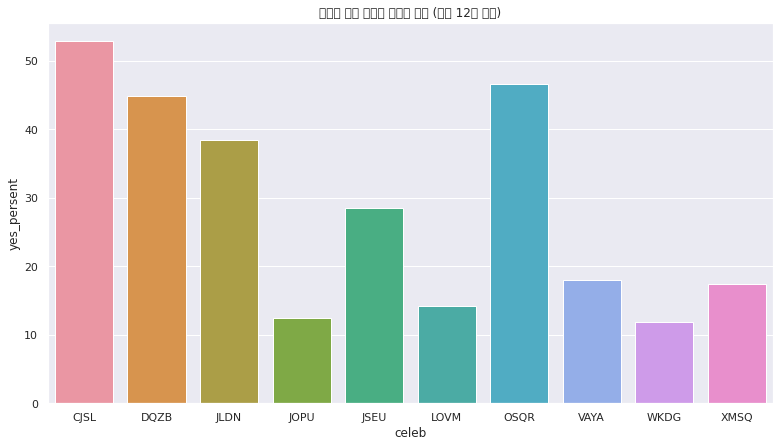

In [ ]:
# 셀럽 별 yes와 no비율 구하기 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))
sns.set_style("darkgrid")
sns.set(font_scale = 1)
sns.set_palette('rainbow')
g_start = sns.barplot(data=data_start_yesno, x="celeb", y="yes_persent")
g_start.set_title("셀럽이 먼저 대화를 시작한 비율 (오전 12시 기준)")
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 대화 시간 구해야 함!!
# 대화 시간은 x축이 시간, y축이 하루에서 차지하는 대화 비율

#### 2. 셀럽과 팬의 대화 비율 평균 (stackted bar chart)
  - top 10 셀럽 대화 비율 
  - 셀럽 각각 비교 (전체 대화중에 셀럽의 대화가 얼마나 되는지)

In [ ]:
data_isin = data.drop('Unnamed: 0', axis=1) # 잘 정돈된 데이터가 왔을 경우에 지워주는 코드

In [ ]:
data_ratio = data_isin.dropna(subset = ['comments']) # comments컬럼을 기준으로 결측값 있는 행 drop
data_ratio = data_ratio.drop('file', axis=1) # file 컬럼 삭제
drop_index = data_ratio[data_ratio['comments'].str.contains('님이 참여했습니다.')].index
data_ratio = data_ratio.drop(index=drop_index)

In [ ]:
data_ratio

,date,time,celeb,code,comments
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..
6,2021-07-12,20:42,VAYA,VAYA,Operator오우오우
7,2021-07-12,20:42,VAYA,MLSC,그건 아닌가보네요.
8,2021-07-12,20:42,VAYA,VAYA,Operator껄껄
...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...


In [ ]:
data_ratio_cel
data_ratio_user

🥺 제대로 데이터가 들어오면 아래 코드의 celeb의 순서를 top순서로 바꿔주면 좋을 것 같다.

In [ ]:
data_ratio = data_ratio.groupby(['celeb', 'code']).count().reset_index()

In [ ]:
data_ratio = data_ratio.drop(["time", "comments"], axis=1)

In [ ]:
data_ratio

,celeb,code,date
0,CJSL,ADGN,32
1,CJSL,BNTE,47
2,CJSL,BPQW,1
3,CJSL,BWXT,27
4,CJSL,BXKT,75
...,...,...,...
197,XMSQ,WSFL,242
198,XMSQ,XAAO,1
199,XMSQ,XMSQ,747
200,XMSQ,ZINE,1


In [ ]:
data_ratio_cel = data_ratio[data_ratio['celeb'] == data_ratio['code']]

In [ ]:
data_ratio_cel

,celeb,code,date
8,CJSL,CJSL,531
51,DQZB,DQZB,117
84,JLDN,JLDN,373
102,JOPU,JOPU,16
110,JSEU,JSEU,8
116,LOVM,LOVM,32
124,OSQR,OSQR,36
144,VAYA,VAYA,334
172,WKDG,WKDG,337
199,XMSQ,XMSQ,747


In [ ]:
# temporary index
tem_index = data_ratio_cel.index

# 위 인덱스를 기반으로 셀럽에 해당하는 행들 다 걸러주기 (유저들만 남기기)
data_ratio_user = data_ratio.drop(tem_index)

In [ ]:
# 너무 적게 보낸 유령 유저들 삭제 (메세지 2개 이하)
data_ratio_user = data_ratio_user.drop(data_ratio_user[data_ratio_user['date'] <= 2].index)

In [ ]:
# user 인당 평균을 구해야 함
user_mean = data_ratio_user.groupby('celeb').mean().reset_index()
user_mean

,celeb,date
0,CJSL,43.400000
1,DQZB,14.600000
2,JLDN,33.066667
3,JOPU,18.333333
4,JSEU,7.200000
5,LOVM,26.000000
6,OSQR,6.400000
7,VAYA,133.400000
8,WKDG,63.904762
9,XMSQ,78.947368


In [ ]:
user_sum = data_ratio_user.groupby('celeb').sum().reset_index()
user_sum

,celeb,date
0,CJSL,1085
1,DQZB,146
2,JLDN,496
3,JOPU,110
4,JSEU,36
5,LOVM,52
6,OSQR,32
7,VAYA,2668
8,WKDG,1342
9,XMSQ,1500


In [ ]:
data_ratio_all = data_ratio.groupby(['celeb']).sum().reset_index()

In [ ]:
data_ratio_all

,celeb,date
0,CJSL,1643
1,DQZB,283
2,JLDN,884
3,JOPU,128
4,JSEU,46
5,LOVM,84
6,OSQR,75
7,VAYA,3005
8,WKDG,1686
9,XMSQ,2252


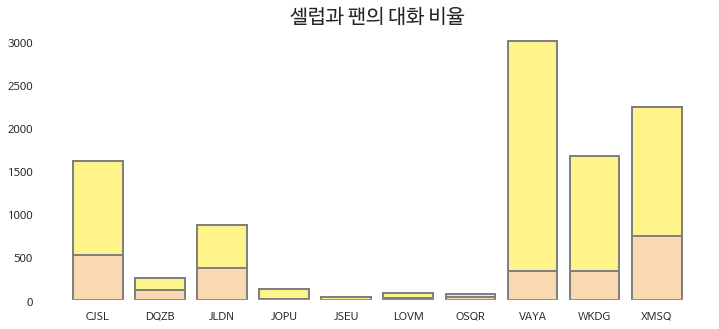

In [ ]:
# 누적 바차트 그리기 (셀럽, 유저 전체 대화량)
# 아래 : 셀럽 / 위: 유저

fig = plt.figure(figsize=(12,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

plt.bar(data_ratio_cel['celeb'], data_ratio_cel['date'], color='#f9d9b1',edgecolor='gray',linewidth=2)
plt.bar(user_sum['celeb'], user_sum['date'], bottom=data_ratio_cel['date'], color='#fff38b',edgecolor='gray',linewidth=2)
plt.title('셀럽과 팬의 대화 비율',fontsize=20)
ax.set_facecolor('white')
plt.show()

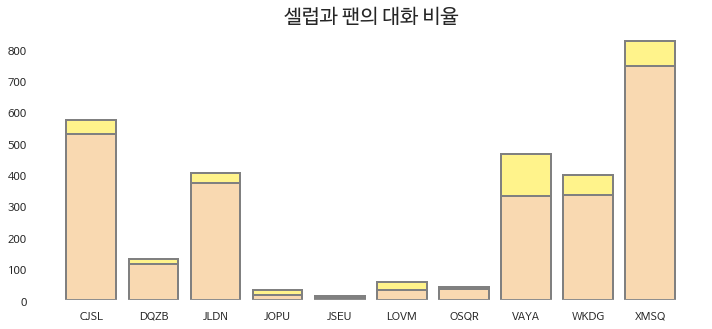

In [ ]:
# 셀럽과 팬의 대화 비율
# 누적 바차트 그리기 (인당 대화량)
# 아래 : 셀럽 / 위: 유저

fig = plt.figure(figsize=(12,5)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

plt.bar(data_ratio_cel['celeb'], data_ratio_cel['date'], color='#f9d9b1',edgecolor='gray',linewidth=2)
plt.bar(user_mean['celeb'], user_mean['date'], bottom=data_ratio_cel['date'], color='#fff38b',edgecolor='gray',linewidth=2)
plt.title('셀럽과 팬의 대화 비율',fontsize=20)
ax.set_facecolor('white')
plt.show()


#fff38b
#fef8c5
#f9d9b1

#### 3. 주별 보내는 첨부파일의 양 평균 (scatter plot)
  - top 10 셀럽 첨부파일의 양 평균
  - top 10 셀럽 활성도 (참여도가 높은 방 순서)에 이미 구해놓음 (act_dic)
  - 🥺 이건 top 10 뿐만 아니라, 모든 데이터를 대상으로 해도 좋은 결과가 나올 수 있을 듯!

In [ ]:
data_isin = data.drop('Unnamed: 0', axis=1) # 잘 정돈된 데이터가 왔을 경우에 지워주는 코드

In [ ]:
data_file = data_isin

In [ ]:
data_file = data_file[data_file['celeb'] == data_file['code']]

In [ ]:
data_file = data_file[data_file['file'] != '']

In [ ]:
data_file

,date,time,celeb,code,comments,file
3103,2021-07-09,13:37,WKDG,WKDG,,Img 1625805447828
3228,2021-07-11,21:24,WKDG,WKDG,,Img 1626006267341
3289,2021-07-12,12:50,WKDG,WKDG,,Img 1626061827922
3324,2021-07-13,19:58,WKDG,WKDG,,Img 1626173932372
3357,2021-07-14,15:56,WKDG,WKDG,,Img 1626245795882
...,...,...,...,...,...,...
10187,2021-08-10,08:43,JOPU,JOPU,,Img 1628552600460
10211,2021-08-10,10:03,JOPU,JOPU,,파일_1628557385135.mov
10229,2021-08-10,18:22,JOPU,JOPU,,Img 1628587350600
10230,2021-08-10,18:22,JOPU,JOPU,,Img 1628587350600


In [ ]:
data_file['date'] = pd.to_datetime(data_file['date'])

In [ ]:
data_file = data_file[['celeb', 'date', 'file']]

In [ ]:
data_file

,celeb,date,file
3103,WKDG,2021-07-09,Img 1625805447828
3228,WKDG,2021-07-11,Img 1626006267341
3289,WKDG,2021-07-12,Img 1626061827922
3324,WKDG,2021-07-13,Img 1626173932372
3357,WKDG,2021-07-14,Img 1626245795882
...,...,...,...
10187,JOPU,2021-08-10,Img 1628552600460
10211,JOPU,2021-08-10,파일_1628557385135.mov
10229,JOPU,2021-08-10,Img 1628587350600
10230,JOPU,2021-08-10,Img 1628587350600


In [ ]:
data_file = data_file.groupby('celeb').resample('W', on='date').count()

In [ ]:
data_file = data_file[['file']]

In [ ]:
data_file = data_file.reset_index()

In [ ]:
data_file

,celeb,date,file
0,CJSL,2021-06-13,5
1,CJSL,2021-06-20,18
2,CJSL,2021-06-27,12
3,CJSL,2021-07-04,5
4,CJSL,2021-07-11,5
5,CJSL,2021-07-18,6
6,CJSL,2021-07-25,7
7,CJSL,2021-08-01,6
8,CJSL,2021-08-08,3
9,CJSL,2021-08-15,5


In [ ]:
# 셀럽 별 일주일에 평균 몇개의 사진을 보냈는가
# data_file_result
data_file_res = data_file.groupby(['celeb']).mean()

In [ ]:
### 여기 해야함. 근데 이걸로 그래프를 어떻게 만들지,, 응답률이나, 팬의 수, 채팅방의 활성화 정도와 함께 연관 지어서 그래프 만들면 좋을듯 

In [ ]:
#### 이렇게 하자! 사진 보내는 양이 많을 수록 활성도가 높을 것이다. x축은 사진 y축은 활성도로 해서 상관관계를 구해보자

In [ ]:
# 시각화 

# fig = plt.figure(figsize=(12,5)) ## 캔버스 생성
# ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

# plt.bar(data_ratio_cel['celeb'], data_ratio_cel['date'], color='#f9d9b1',edgecolor='gray',linewidth=2)
# plt.bar(user_mean['celeb'], user_mean['date'], bottom=data_ratio_cel['date'], color='#fff38b',edgecolor='gray',linewidth=2)
# plt.title('셀럽과 팬의 대화 비율',fontsize=20)
# ax.set_facecolor('white')
# plt.show()

In [ ]:
# 활성화 정도와 주 평균 파일 전송량을 dataframe으로 만들어 준다.
data_file_res = data_file_res.reset_index()

In [ ]:
data_file_res

,celeb,file
0,CJSL,6.818182
1,DQZB,4.666667
2,JLDN,3.571429
3,JOPU,5.000000
4,LOVM,2.500000
5,OSQR,1.000000
6,WKDG,3.285714
7,XMSQ,4.285714


In [ ]:
act_df = pd.DataFrame(list(act_dic.items()), columns=['celeb', 'active'])

In [ ]:
act_df

,celeb,active
0,VAYA,126.708
1,WKDG,51.818
2,XMSQ,73.548
3,CJSL,31.130
4,DQZB,10.065
5,JLDN,26.086
6,OSQR,5.867
7,JSEU,4.900
8,LOVM,17.600
9,JOPU,16.875


In [ ]:
# scatter plot을 만들기 위해 두개 merge 해주기 
merged_scatter = pd.merge(data_file_res, act_df, how='right', on='celeb')

# 할것 : merge하고 비는 값 처리 어떻게 할 것인지, (0)으로 처리하기 

In [ ]:
merged_scatter = merged_scatter.fillna(0)

In [ ]:
merged_scatter

,celeb,file,active
0,VAYA,0.000000,126.708
1,WKDG,3.285714,51.818
2,XMSQ,4.285714,73.548
3,CJSL,6.818182,31.130
4,DQZB,4.666667,10.065
5,JLDN,3.571429,26.086
6,OSQR,1.000000,5.867
7,JSEU,0.000000,4.900
8,LOVM,2.500000,17.600
9,JOPU,5.000000,16.875


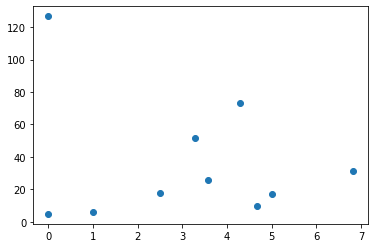

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(merged_scatter['file'], merged_scatter['active'])
plt.show()

# 가로축 : 일별 파일을 보낸 횟수
# 세로축 : 활성정도

🥺 전체 데이터에 대해 시각화를 진행해보면?

### (2) 대화 시간, 요일
사용 dataframe 이름 : data_contime

1. 시간별 셀럽, 유저 모두의 대화량 분석 그래프 (lineplot)
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 그래프 그리는데 이용한 dataframe : time_sum_df

2. 시간별 셀럽, 유저 대화량 분석 그래프 (lineplot)
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 2개의 겹친 line plot

3. 요일별 대화량 분석 그래프 (pieplot)
  - 그래프 labels : [월, 화, 수, 목, 금, 토, 일]
  - 그래프 안에 들어가는 비율 값 : 요일별 대화 비율 (top10 셀럽 평균)


#### 1. 시간별 셀럽, 유저, 둘 다 대화량 분석 그래프 (lineplot)
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 그래프 그리는데 이용한 dataframe : time_sum_df

In [ ]:
data_contime = data.drop('Unnamed: 0', axis=1) # 전처리가 잘된 데이터의 경우 drop뒤로는 날려주세요.

In [ ]:
data_contime

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [ ]:
a = data_contime[['time', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.
a = a.groupby(['celeb', 'time']).count()
a = a.reset_index()
a.head()

In [61]:
# 시간으로 바꿔줌 
# ex) 01:24 -> 1 (1시에 속하므로)
def convert_time(data):
  for i in range(len(data)):
    for j in range(24):
      if int(data['time'][i][0:2]) == j:
        data['time'][i] = j
        break
  return data

In [ ]:
a = convert_time(a)

In [ ]:
time_sum_df = a.groupby(['time']).sum()

# 시간별 대화량의 sum과 mean
sum_val = time_sum_df['code'].sum()
mean_val = time_sum_df['code'].mean()
time_sum_df['deviation'] = time_sum_df['code'] - mean_val
time_sum_df = time_sum_df.reset_index()
time_sum_df

In [ ]:
# plt.figure(figsize=(13, 7))
# time_lineplot = sns.lineplot(data=time_sum_df, x='time', y='deviation', markers='*')
# g_start.set_title("테스트 plot")

In [ ]:
# 사용중인 색상들

# #fff38b
# #fef8c5
# #f9d9b1

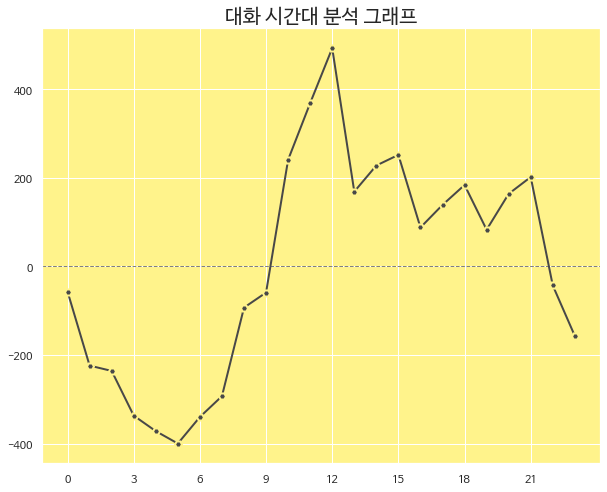

In [ ]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(10,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.axhline(0 ,label='base line', color='gray', linewidth=1, linestyle='dashed')
ax.plot(time_sum_df['time'],
        time_sum_df['deviation'],
        color='#484848',
        linewidth=2,
        marker="H",
        markersize=7,
        markeredgecolor='#fff38b',
        markeredgewidth=2) ## 선그래프 생성

plt.title('시간대별 대화량 추이 (전체)',fontsize=20) ## 타이틀 설정

plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_facecolor('#fff38b')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.show()

- 보통 대화가 낮시간에 분포 한다는 것을 알수 있다. 
- 보통 방송이나, 여가는 밤에 즐기는데, 역시 간단하게 할 수 있는 메신저라는 장점을 살려서, 낮에 문자를 보내는 것이 좋은 것 같다.

#### 2. 시간별 셀럽, 유저 대화량 분석 그래프 (lineplot)
  - 그래프 x축 : 시간 (00시~24시)
  - 그래프 y축 : 대화량 - 대화평균 
  - 2개의 겹친 line plot

In [63]:
# conversation time
data_contime = data.drop('Unnamed: 0', axis=1) # 전처리가 잘된 데이터의 경우 drop뒤로는 날려주세요.

In [64]:
data_contime

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [65]:
data_contime_cel = data_contime[data_contime['celeb']==data_contime['code']]
data_contime_user = data_contime[data_contime['celeb']!=data_contime['code']]

In [66]:
# 셀럽 데이터 처리
data_contime_cel = data_contime_cel[['time', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.
data_contime_cel = data_contime_cel.groupby(['celeb', 'time']).count()
data_contime_cel = data_contime_cel.reset_index()

# 유저 데이터 처리
data_contime_user = data_contime_user[['time', 'celeb', 'code']] # 'code'는 comments와 file을 합친 값으로 count할 수 있기 때문에 남겨준다.
data_contime_user = data_contime_user.groupby(['celeb', 'time']).count()
data_contime_user = data_contime_user.reset_index()

data_contime_cel.head()

,celeb,time,code
0,CJSL,00:01,1
1,CJSL,00:02,1
2,CJSL,00:05,2
3,CJSL,00:06,1
4,CJSL,00:15,1


In [67]:
# 시간으로 바꿔줌 
# ex) 01:24 -> 1 (1시에 속하므로)
data_contime_cel = convert_time(data_contime_cel)
data_contime_user = convert_time(data_contime_user)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
time_sum_df_cel = data_contime_cel.groupby(['time']).sum()

# 시간별 대화량의 sum과 mean
sum_val = time_sum_df_cel['code'].sum()
mean_val = time_sum_df_cel['code'].mean()
time_sum_df_cel['deviation'] = time_sum_df_cel['code'] - mean_val
time_sum_df_cel = time_sum_df_cel.reset_index()

data_contime_user = data_contime_user.groupby(['time']).sum()
# 시간별 대화량의 sum과 mean
sum_val = data_contime_user['code'].sum()
mean_val = data_contime_user['code'].mean()
data_contime_user['deviation'] = data_contime_user['code'] - mean_val
data_contime_user = data_contime_user.reset_index()
data_contime_user

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_

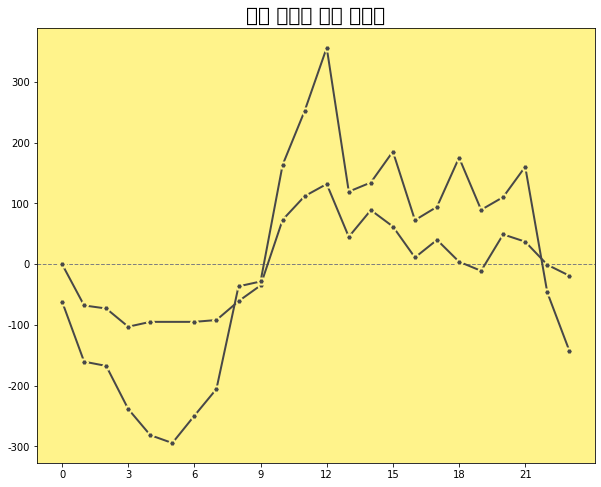

In [71]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(10,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

# baseline 생성
ax.axhline(0 ,label='base line', color='gray', linewidth=1, linestyle='dashed')

# 셀럽 선그래프
ax.plot(time_sum_df_cel['time'],
        time_sum_df_cel['deviation'],
        color='#484848',
        linewidth=2,
        marker="H",
        markersize=7,
        markeredgecolor='#fff38b',
        markeredgewidth=2) ## 선그래프 생성

# 유저 선그래프
ax.plot(data_contime_user['time'],
        data_contime_user['deviation'],
        color='#484848',
        linewidth=2,
        marker="H",
        markersize=7,
        markeredgecolor='#fff38b',
        markeredgewidth=2) ## 선그래프 생성

plt.title('시간대별 대화량 추이 (셀럽, 유저)',fontsize=20) ## 타이틀 설정

plt.xticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_facecolor('#fff38b')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.show()

#### 3. 요일별 대화량 분석 그래프 (pieplot)
  - 그래프 labels : [월, 화, 수, 목, 금, 토, 일]
  - 그래프 안에 들어가는 비율 값 : 요일별 대화 비율 (top10 셀럽 평균)


In [100]:
data_day = data.drop('Unnamed: 0', axis=1) 

In [101]:
data_day

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [102]:
# datetime으로 변경
data_day['date'] = pd.to_datetime(data_day['date'])

In [103]:
data_day['day'] = data_day['date'].dt.day_name()

In [104]:
data_day

,date,time,celeb,code,comments,file,day
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,,Monday
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,,Monday
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,,Monday
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,,Monday
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,,Monday
...,...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,,Wednesday
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,,Wednesday
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,,Wednesday
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,,Wednesday


In [105]:
# 요일로 groupby

data_day = data_day.groupby('day').count().reset_index()

In [106]:
data_day = data_day[['day', 'date']]

In [107]:
data_day

,day,date
0,Friday,1522
1,Monday,1586
2,Saturday,1338
3,Sunday,1223
4,Thursday,1571
5,Tuesday,1575
6,Wednesday,1482


In [108]:
data_day = data_day.sort_values(by=['date'], axis=0, ascending=False)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


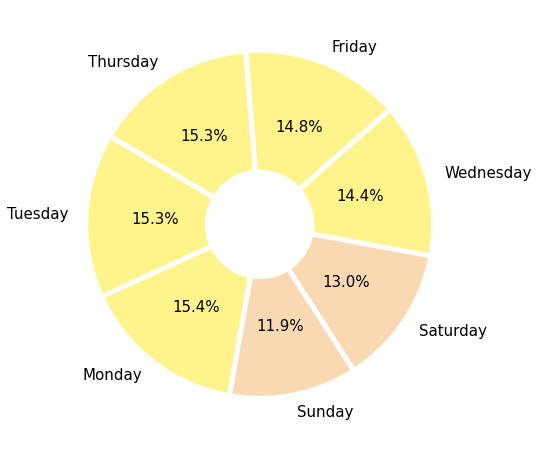

In [113]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ratio = data_day['date']
labels = data_day['day']
colors = ['#fff38b', '#fff38b', '#fff38b', '#fff38b', '#fff38b', '#f9d9b1', '#f9d9b1']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.rc('font', size=15)  

#fff38b
#fef8c5
#f9d9b1

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

### (3) 시간의 흐름에 따른 셀럽의 말에 대한 팬의 응답률

In [ ]:
data_resp = data.drop('Unnamed: 0', axis=1) # 전처리가 잘된 데이터의 경우 drop뒤로는 날려주세요.

In [ ]:
data_resp

,date,time,celeb,code,comments,file
0,2021-07-12,20:39,VAYA,KAMF,님이 참여했습니다.,
1,2021-07-12,20:40,VAYA,KAMF,사랑해요🖤,
2,2021-07-12,20:40,VAYA,MLSC,님이 참여했습니다.,
3,2021-07-12,20:41,VAYA,ZSOS,님이 참여했습니다.,
4,2021-07-12,20:41,VAYA,MLSC,단톡 전용 인스타 대체일지... 자려고했는데 파들..,
...,...,...,...,...,...,...
10292,2021-08-18,08:56,JOPU,BYZG,ㅎㅎ 오늘도 비가 주륵주륵~ 벼보리님 우산 잘 쓰고 다니셔요 !,
10293,2021-08-18,17:38,JOPU,JOPU,Operator오늘은 ~ 수요일 ~ 스팀겜 하는 날~ 일주일의 절반이 벌써 다가왔네...,
10294,2021-08-18,18:03,JOPU,CCAA,재밌는시간 보내셨겠네요 ㅎㅎ\n저는 학교갔는데 생각했던것보단 정겹고 좋네요 은근 ㅎ...,
10295,2021-08-18,18:15,JOPU,ZWYM,보리쟝이무화과를 먹었으니 저는 복숭아를 먹겠읍니다 후후\n푹 쉬고 7시에 방송에서...,


In [36]:
# 시간으로 바꿔줌 
# ex) 01:24 -> 1 (1시에 속하므로)
for i in range(len(b)):
  for j in range(24):
    if int(b['time'][i][0:2]) == j:
      b['time'][i] = j
      break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
b

,celeb,time,code
0,CJSL,0,1
1,CJSL,0,1
2,CJSL,0,2
3,CJSL,0,1
4,CJSL,0,1
...,...,...,...
1379,XMSQ,23,2
1380,XMSQ,23,2
1381,XMSQ,23,1
1382,XMSQ,23,1


### (4) 시간의 흐름에 따른 긍정도 변화 선그래프

## 상위 n퍼센트 외 나머지

### 얼마를 낼 의향있소!의 비율과 만족도 (평균 점수, 점수 비율)

# 그 외에 추가하면 좋을 사항 정리
- 셀럽 대화 분석 (워드 클라우드)
- 대화 주제 분석 (모델링 해보자) 일상인지, 뭐인지, 모델링 
- 팬의 대화 적극성과 셀럽 행동의 상관관계
